In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [50]:
df=pd.read_csv('Company Stock and Investment.csv')

In [51]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [52]:
df.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793
1983,15-11-2017,-0.007006,0.005963,-0.013190,-0.008928


In [53]:
df.drop('Other sharesInvestments',axis=1,inplace=True)

In [54]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock
0,31-12-2009,0.025417,0.000150,0.017354
1,04-01-2010,0.026830,0.001097,0.015565
2,05-01-2010,0.002699,0.001560,0.001729
3,06-01-2010,0.021688,0.006009,-0.015906
4,07-01-2010,-0.006256,0.000221,-0.001849


In [55]:
df.drop('Comp Stock',axis=1,inplace=True)
df.drop('Gold Investments',axis=1,inplace=True)

<AxesSubplot:>

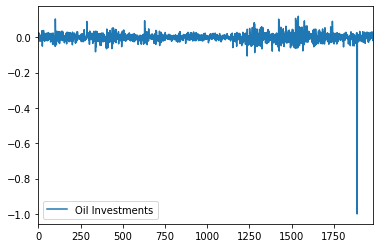

In [56]:
df.plot()

In [57]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [58]:
test_result=adfuller(df['Oil Investments'])

In [59]:
df.tail()

,Date,Oil Investments
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376
1983,15-11-2017,-0.007006


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
Date               1984 non-null object
Oil Investments    1984 non-null float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [61]:
df.set_index('Date',inplace=True)

In [62]:
df.head()

,Oil Investments
Date,
31-12-2009,0.025417
04-01-2010,0.026830
05-01-2010,0.002699
06-01-2010,0.021688
07-01-2010,-0.006256


In [63]:
df.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


# Step 2: Visualize the Data

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

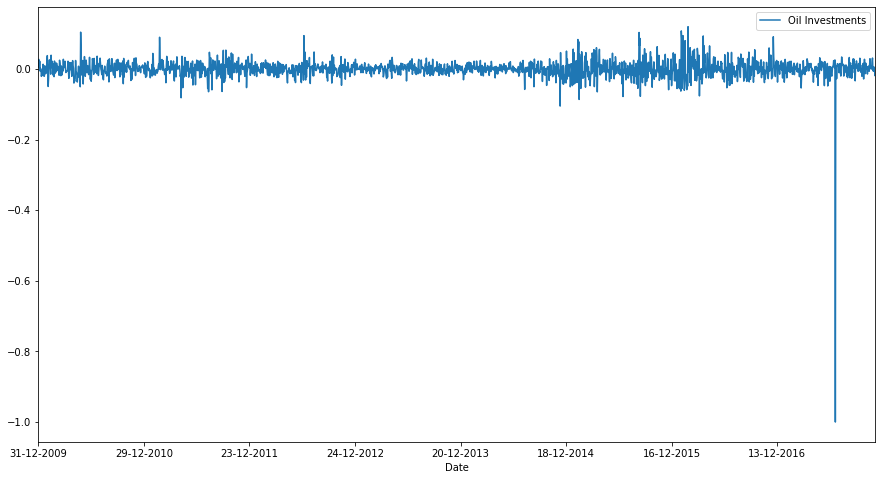

In [76]:
df.plot(figsize=(15,8))

In [65]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [66]:
test_result=adfuller(df['Oil Investments']) # adfuller give us 5 values

In [67]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-45.942162929839924, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


# Most important value is p-value above

In [78]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Oil_Investments):
    result=adfuller(Oil_Investments) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [79]:
adfuller_test(df['Oil Investments'])

ADF Test Statistic : -45.942162929839924
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


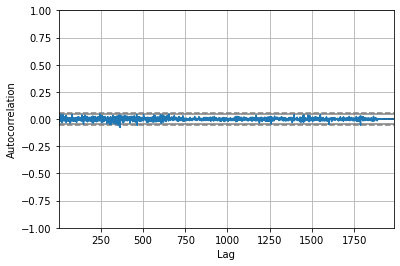

In [81]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Oil Investments'])
plt.show()

In [82]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

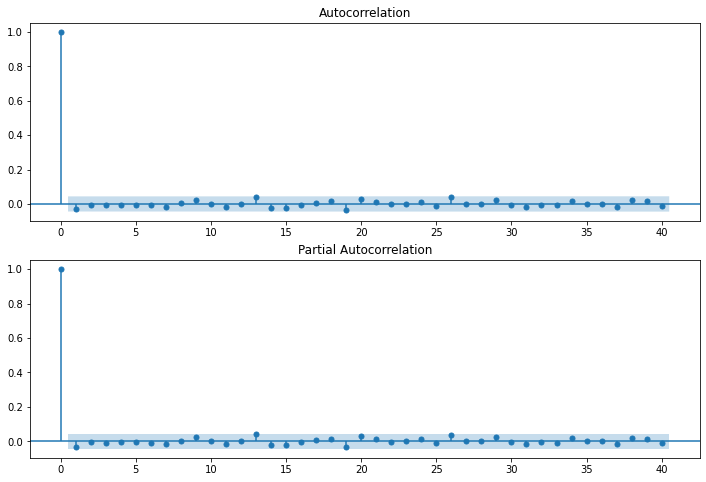

In [83]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df['Oil Investments'].iloc[0:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Oil Investments'].iloc[0:],lags=40,ax=ax2)

In [84]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [85]:
model=ARIMA(df['Oil Investments'],order=(1,1,0)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [86]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3668.303
Method:                       css-mle   S.D. of innovations              0.038
Date:                Tue, 20 Oct 2020   AIC                          -7330.606
Time:                        15:16:59   BIC                          -7313.828
Sample:                             1   HQIC                         -7324.443
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.872e-05      0.001     -0.033      0.974      -0.001       0.001
ar.L1.D.Oil Investments    -0.5130      0.019    -26.631      0.000      -0.551      -0.475
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9492           +0.0000j            1.9492            0.5000
-----------------------------------------------------------------------------
"""

In [32]:
df['Sales First Difference'] = df['Oil Investments'] - df['Oil Investments'].shift(1)

In [34]:
df['Oil Investments'].shift(1).head() # its shift one down

0         NaN
1    0.025417
2    0.026830
3    0.002699
4    0.021688
Name: Oil Investments, dtype: float64

In [87]:
df['forecast']=model_fit.predict(start=10,end=3000,dynamic=True)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

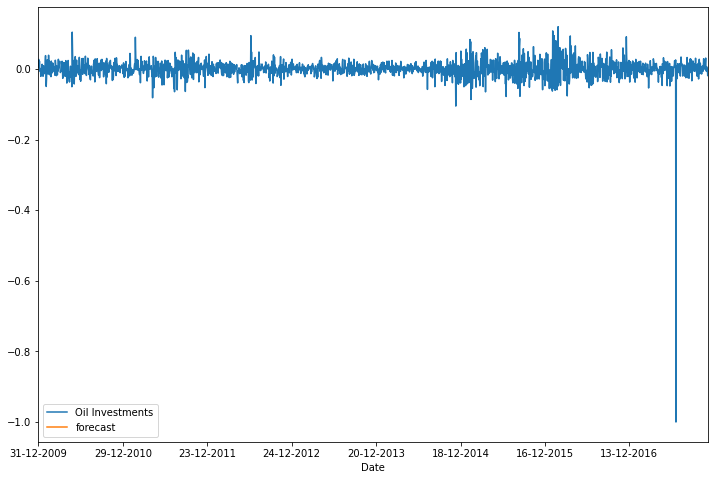

In [99]:
df['forecast']=model_fit.predict(start=90,end=9000,dynamic=True)
df[['Oil Investments','forecast']].plot(figsize=(12,8))

In [100]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [102]:
model=sm.tsa.statespace.SARIMAX(df['Oil Investments'],order=(1, 1, 0),seasonal_order=(1,1,0,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

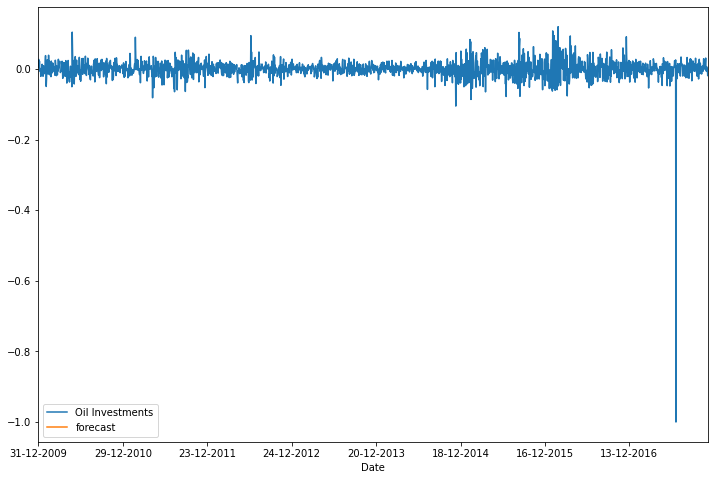

In [103]:
df['forecast']=results.predict(start=90,end=10000,dynamic=True)
df[['Oil Investments','forecast']].plot(figsize=(12,8))

In [ ]:
# Conclusion oil investestment is almost vary with in the specigic moving averge